Accuracy on the test set: 85.50%


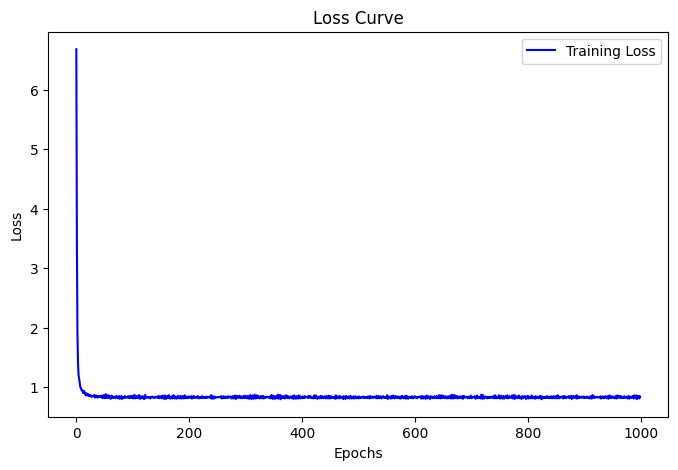

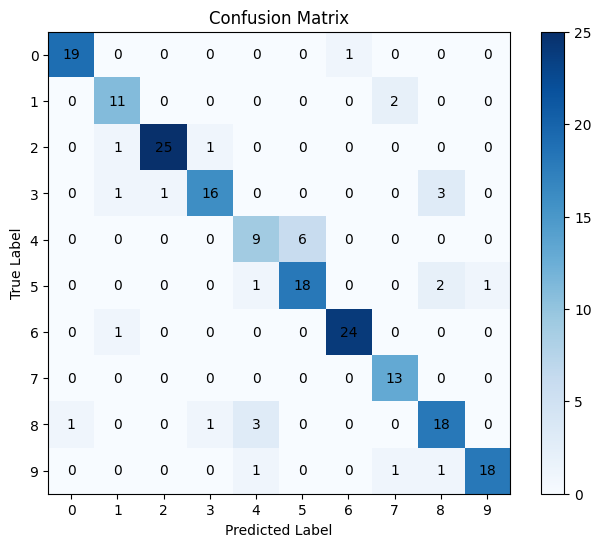

FileNotFoundError: [Errno 2] No such file or directory: 'mnist_test.csv'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class SVM:
    def _init_(self, learning_rate=0.001, epochs=1000, regularization_strength=0.01):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.regularization_strength = regularization_strength

    def fit(self, X, y, num_classes):
        n_samples, n_features = X.shape
        self.weights = np.zeros((num_classes, n_features))
        self.biases = np.zeros(num_classes)
        self.loss_history = []

        for epoch in range(self.epochs):
            loss = 0
            for i in range(n_samples):
                for c in range(num_classes):
                    
                    y_i = 1 if y[i] == c else -1
                    margin = np.dot(X[i], self.weights[c]) + self.biases[c]
                    if y_i * margin < 1:
                        dw = self.weights[c] - y_i * X[i]
                        db = -y_i
                        loss += 1 - y_i * margin
                    else:
                        dw = self.weights[c]
                        db = 0

                    self.weights[c] -= self.learning_rate * (dw + self.regularization_strength * self.weights[c])
                    self.biases[c] -= self.learning_rate * db

            reg_loss = 0.5 * self.regularization_strength * np.sum(self.weights**2)
            total_loss = loss / n_samples + reg_loss
            self.loss_history.append(total_loss)

    def predict(self, X):
        scores = np.dot(X, self.weights.T) + self.biases
        return np.argmax(scores, axis=1)

train_df = pd.read_csv('mnist_test.csv')


X = train_df.drop('label', axis=1).values
y = train_df['label'].values

X = np.where(X > 0, 1, 0)

def train_test_split(X, y, test_size=0.2, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
    indices = np.random.permutation(len(X))
    test_size = int(len(X) * test_size)
    test_indices = indices[:test_size]
    train_indices = indices[test_size:]
    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=120)


def standardize(X_train, X_test):
    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0)
    std[std == 0] = 1  
    X_train_std = (X_train - mean) / std
    X_test_std = (X_test - mean) / std
    return X_train_std, X_test_std


X_train, X_test = standardize(X_train, X_test)


num_classes = len(np.unique(y_train))
svm_model = SVM(learning_rate=0.001, epochs=1000, regularization_strength=0.01)
svm_model.fit(X_train, y_train, num_classes)


y_pred = svm_model.predict(X_test)

def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

accuracy_value = accuracy(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy_value * 100:.2f}%")


plt.figure(figsize=(8, 5))
plt.plot(svm_model.loss_history, label='Training Loss', color='blue')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

def plot_confusion_matrix(y_true, y_pred, num_classes):
    conf_matrix = np.zeros((num_classes, num_classes), dtype=int)
    for true, pred in zip(y_true, y_pred):
        conf_matrix[true][pred] += 1

    plt.figure(figsize=(8, 6))
    plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.xticks(range(num_classes), labels=range(num_classes))
    plt.yticks(range(num_classes), labels=range(num_classes))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    for i in range(num_classes):
        for j in range(num_classes):
            plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='black')
    plt.show()

plot_confusion_matrix(y_test, y_pred, num_classes)

In [ ]:
import joblib
# Save the trained SVM model
joblib.dump(svm_model, "model/digit_recognizer_2")
print("Model saved as model/digit_recognizer_2")


Model saved as model/digit_recognizer_2


In [ ]:
import joblib
import cv2
import numpy as np
import pyscreenshot as ImageGrab
import time

# Load the updated pre-trained SVM model
model = joblib.load("model/digit_recognizer_2")
image_folder = "./img/"

while True:
    # Capture the screen region
    img = ImageGrab.grab(bbox=(60, 470, 400, 870))
    img.save(image_folder + "img.png")
    
    # Preprocess the image
    im = cv2.imread(image_folder + "img.png")
    im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    im_gray = cv2.GaussianBlur(im_gray, (15, 15), 0)
    
    # Threshold the image
    _, im_th = cv2.threshold(im_gray, 100, 255, cv2.THRESH_BINARY)
    roi = cv2.resize(im_th, (28, 28), interpolation=cv2.INTER_AREA)
    
    # Normalize the image
    roi = roi / 255.0
    X = roi.flatten()  # Flatten into a single array
    
    # Predict the digit
    predictions = model.predict([X])
    print("Prediction:", predictions[0])
    
    # Display the result
    cv2.putText(im, f"Prediction: {predictions[0]}", (20, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.imshow("Result", im)
    
    # Wait for 10 seconds
    time.sleep(5)

    # Break on Enter key
    if cv2.waitKey(1) == 13:  # Press Enter to exit
        break

cv2.destroyAllWindows()


Prediction: 4
Prediction: 4
Prediction: 3
Prediction: 3
Prediction: 3
Prediction: 8
Prediction: 8
Prediction: 0
Prediction: 0
Prediction: 0
Prediction: 0
Prediction: 0
Prediction: 0
Prediction: 0
Prediction: 0
Prediction: 0
Prediction: 0
Prediction: 0
Prediction: 0
Prediction: 0
Prediction: 0
Prediction: 0
Prediction: 0
Prediction: 0
Prediction: 8
Prediction: 8
Prediction: 0
Prediction: 0
Prediction: 0
Prediction: 0
Prediction: 0
Prediction: 5
Prediction: 5
Prediction: 5
Prediction: 0
Prediction: 0
Prediction: 8
Prediction: 8
Prediction: 8
Prediction: 3
Prediction: 0
Prediction: 0
Prediction: 0
Prediction: 0
Prediction: 0
Prediction: 4
Prediction: 4
Prediction: 4
Prediction: 0
Prediction: 4
Prediction: 4
Prediction: 4
Prediction: 5
Prediction: 4
Prediction: 4
Prediction: 3
Prediction: 8
Prediction: 8
Prediction: 8
Prediction: 8
Prediction: 8
Prediction: 8
Prediction: 3
Prediction: 8
Prediction: 8
Prediction: 4
Prediction: 4
Prediction: 4
Prediction: 4
Prediction: 3
Prediction: 3
Predic

KeyboardInterrupt: 

: 